# Data Science Job Prediciton
This notebook uses machine learning algorithms to predict whether the candidate is likely to change job or not.

## 1. Problem Definition
Problem is to predict whether a candidate is going to change the job or not.

## 2. Data

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.
The whole data divided to train and test . 


For more details pertaining data refer to https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

## 3. Evaluation 
The goal is to predict with the accuracy of more than 90%.

## 4. Feature
* enrollee_id : Unique ID for candidate
* city: City code
* city_development_index : Developement index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change

#### Exploratory Data Analysis

In [1]:
# Importing the important libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
# Importing the dataset 
df = pd.read_csv("data/train.csv")
df.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [4]:
# Removing the enrollee_id from dataset
df.drop("enrollee_id", axis=1, inplace=True)
df.head()

city  city_development_index gender      relevent_experience  \
0  city_103                   0.920   Male  Has relevent experience   
1   city_40                   0.776   Male   No relevent experience   
2   city_21                   0.624    NaN   No relevent experience   
3  city_115                   0.789    NaN   No relevent experience   
4  city_162                   0.767   Male  Has relevent experience   

  enrolled_university education_level major_discipline experience  \
0       no_enrollment        Graduate             STEM        >20   
1       no_enrollment        Graduate             STEM         15   
2    Full time course        Graduate             STEM          5   
3                 NaN        Graduate  Business Degree         <1   
4       no_enrollment         Masters             STEM        >20   

  company_size    company_type last_new_job  training_hours  target  
0          NaN             NaN            1              36     1.0  
1        50-99         Pvt Ltd           >4              47     0.0  
2          NaN             NaN        never              83     0.0  
3          NaN         Pvt Ltd        never              52     1.0  
4        50-99  Funded Startup            4               8     0.0

In [5]:
# Tracking the missing values
df.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
# Comparing categories in relevent_experience column
df["relevent_experience"].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [7]:
# comparing categories in gender column
df["gender"].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

In [8]:
# comparing categories in enrolled_university columns
df["enrolled_university"].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [9]:
df["enrolled_university"].count()

18772

In [10]:
# comparing categories in education_level column
df["education_level"].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [11]:
# comparing categories in major_discipline column
df["major_discipline"].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [12]:
# comparing categories in expereince column
df["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [13]:
# comparing categories in company_size column
df["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [14]:
# comparing categories in company_type column
df["company_type"].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [15]:
# comparing categories in last_new_job column
df["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

In [16]:
# comparing categories in target column
df["target"].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [17]:
# Comparing gender with target
pd.crosstab(df.target, df.gender)

gender  Female   Male  Other
target                      
0.0        912  10209    141
1.0        326   3012     50

#### Numerical features

In [18]:
# Getting numerical features
numerical_features = [feature for feature in df.columns if pd.api.types.is_numeric_dtype(df[feature])]
numerical_features

['city_development_index', 'training_hours', 'target']

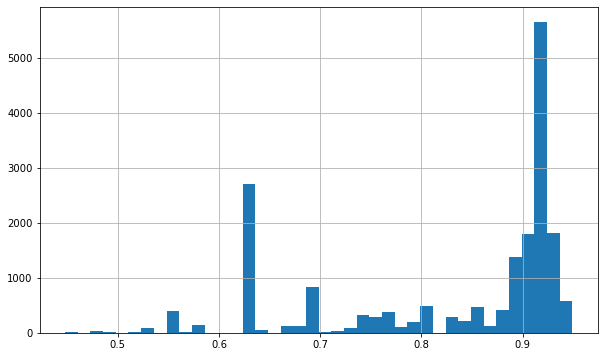

In [19]:
# Checking the normality of city_development_index feature
df["city_development_index"].hist(figsize=(10, 6), bins=40);

This graph shows that city_development_index is not normal distributed.


#### Object Features 

In [20]:
# Getting string features
string_features = [feature for feature in df.columns if not pd.api.types.is_numeric_dtype(df[feature])]
string_features

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

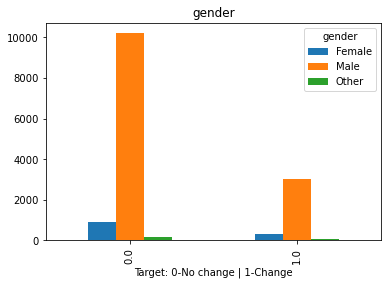

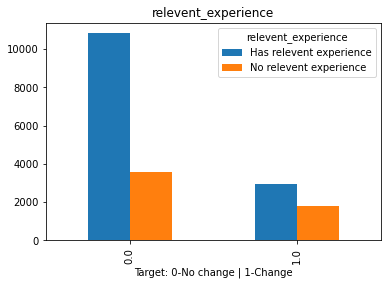

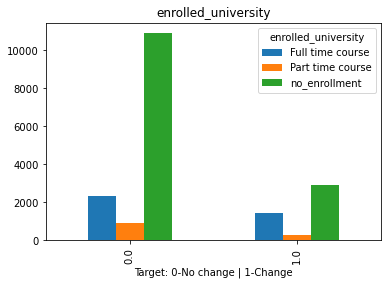

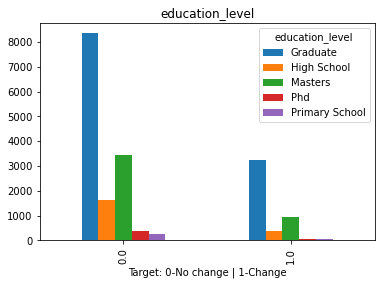

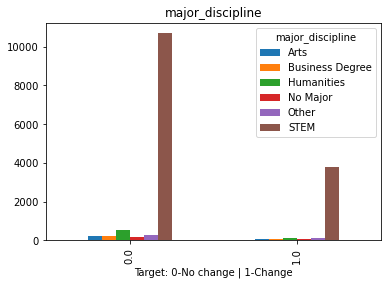

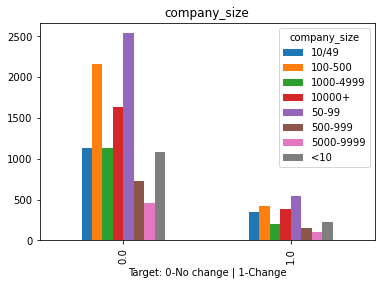

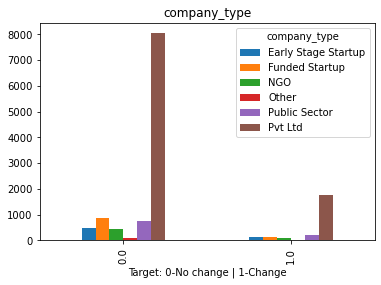

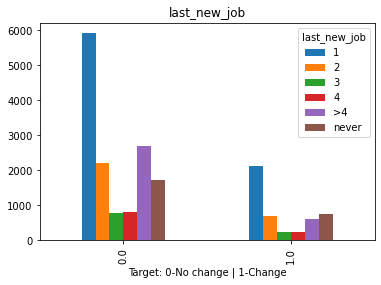

In [21]:
# Comparing string values with target feature
for feature in string_features:
    if feature not in ["experience", "city"]:
        pd.crosstab(df["target"], df[feature]).plot.bar()
        plt.title(feature)
        plt.xlabel("Target: 0-No change | 1-Change");

#### Converting string values into categories

In [22]:
# Creating another copy of dataframe 
df_temp = df.copy()

for feature in string_features:
    df_temp[feature] = df_temp[feature].astype("category").cat.as_ordered()
    
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   city                    19158 non-null  category
 1   city_development_index  19158 non-null  float64 
 2   gender                  14650 non-null  category
 3   relevent_experience     19158 non-null  category
 4   enrolled_university     18772 non-null  category
 5   education_level         18698 non-null  category
 6   major_discipline        16345 non-null  category
 7   experience              19093 non-null  category
 8   company_size            13220 non-null  category
 9   company_type            13018 non-null  category
 10  last_new_job            18735 non-null  category
 11  training_hours          19158 non-null  int64   
 12  target                  19158 non-null  float64 
dtypes: category(10), float64(2), int64(1)
memory usage: 643.6 KB


### Filling the Missing values 


In [23]:
# Filling the numerical values
for feature in string_features:
    # Adding binary column that tells whether this row was missing or not
    df_temp[feature+"_is_missing"] = pd.isnull(df_temp[feature])
    # converting categorical data to number and adding 1 to it
    df_temp[feature] = pd.Categorical(df_temp[feature]).codes+1
    
# Checking missing values
df_temp.isna().sum()

city                              0
city_development_index            0
gender                            0
relevent_experience               0
enrolled_university               0
education_level                   0
major_discipline                  0
experience                        0
company_size                      0
company_type                      0
last_new_job                      0
training_hours                    0
target                            0
city_is_missing                   0
gender_is_missing                 0
relevent_experience_is_missing    0
enrolled_university_is_missing    0
education_level_is_missing        0
major_discipline_is_missing       0
experience_is_missing             0
company_size_is_missing           0
company_type_is_missing           0
last_new_job_is_missing           0
dtype: int64

In [24]:
df_temp.head()

city  city_development_index  gender  relevent_experience  \
0     6                   0.920       2                    1   
1    78                   0.776       2                    2   
2    65                   0.624       0                    2   
3    15                   0.789       0                    2   
4    51                   0.767       2                    1   

   enrolled_university  education_level  major_discipline  experience  \
0                    3                1                 6          22   
1                    3                1                 6           7   
2                    1                1                 6          16   
3                    0                1                 2          21   
4                    3                3                 6          22   

   company_size  company_type  ...  city_is_missing  gender_is_missing  \
0             0             0  ...            False              False   
1             5             6  ...            False              False   
2             0             0  ...            False               True   
3             0             6  ...            False               True   
4             5             2  ...            False              False   

   relevent_experience_is_missing  enrolled_university_is_missing  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                            True   
4                           False                           False   

   education_level_is_missing  major_discipline_is_missing  \
0                       False                        False   
1                       False                        False   
2                       False                        False   
3                       False                        False   
4                       False                        False   

   experience_is_missing  company_size_is_missing  company_type_is_missing  \
0                  False                     True                     True   
1                  False                    False                    False   
2                  False                     True                     True   
3                  False                     True                    False   
4                  False                    False                    False   

   last_new_job_is_missing  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 23 columns]

In [25]:
# Editing the setting to view all columns
pd.pandas.set_option("display.max_columns", None)

df_temp.head()

city  city_development_index  gender  relevent_experience  \
0     6                   0.920       2                    1   
1    78                   0.776       2                    2   
2    65                   0.624       0                    2   
3    15                   0.789       0                    2   
4    51                   0.767       2                    1   

   enrolled_university  education_level  major_discipline  experience  \
0                    3                1                 6          22   
1                    3                1                 6           7   
2                    1                1                 6          16   
3                    0                1                 2          21   
4                    3                3                 6          22   

   company_size  company_type  last_new_job  training_hours  target  \
0             0             0             1              36     1.0   
1             5             6             5              47     0.0   
2             0             0             6              83     0.0   
3             0             6             6              52     1.0   
4             5             2             4               8     0.0   

   city_is_missing  gender_is_missing  relevent_experience_is_missing  \
0            False              False                           False   
1            False              False                           False   
2            False               True                           False   
3            False               True                           False   
4            False              False                           False   

   enrolled_university_is_missing  education_level_is_missing  \
0                           False                       False   
1                           False                       False   
2                           False                       False   
3                            True                       False   
4                           False                       False   

   major_discipline_is_missing  experience_is_missing  \
0                        False                  False   
1                        False                  False   
2                        False                  False   
3                        False                  False   
4                        False                  False   

   company_size_is_missing  company_type_is_missing  last_new_job_is_missing  
0                     True                     True                    False  
1                    False                    False                    False  
2                     True                     True                    False  
3                     True                    False                    False  
4                    False                    False                    False

### Model Training

In [26]:
# Getting dataset ready
X = df_temp.drop("target", axis=1)
y = df_temp.target

In [27]:
# Splitting dataset into train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
# Importing random forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Scoring train dataset
model.score(X_train, y_train)

0.9989560224455174

In [30]:
# Scoring test dataset
model.score(X_test, y_test)

0.7755741127348643

#### Trying some more classifiers 

In [31]:
# Importing more classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [32]:
# Creating function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and scores the model from models dictionary.
    """
    
    # Creating empty model_score dictionary
    model_scores = {}
    
    for name, model in models.items():
        # Setting random state
        np.random.seed(42)
        
        # Fitting the model
        model.fit(X_train, y_train)
        
        # Scoring and adding it to model_score dict
        model_scores[name+" (train)"] = model.score(X_train, y_train)
        model_scores[name+" (test)"] = model.score(X_test, y_test)
        
    return model_scores

In [33]:
# dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier()
}

# Testing scores on different models
initial_model_score = fit_and_score(models, X_train, X_test, y_train, y_test)
initial_model_score

D:\ML_Projects\Job-Change-Prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression (train)': 0.7626908521466789,
 'Logistic Regression (test)': 0.7502609603340292,
 'KNN (train)': 0.8236330418895994,
 'KNN (test)': 0.7398225469728601,
 'Random Forest Classifier (train)': 0.9989560224455174,
 'Random Forest Classifier (test)': 0.7828810020876826}

Looking from this it can be concluded that KNN and Log_regression are working fine but are having less score and RandomForest is prone to high variance.

In [34]:
df.target.value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

#### Over-Sampling the dataset

In [35]:
# Importing the imblearn SMOTETomek
from imblearn.combine import SMOTETomek

over_samp = SMOTETomek(random_state=42)
X_os, y_os = over_samp.fit_resample(X, y)

In [36]:
y_os.value_counts()

1.0    14064
0.0    14064
Name: target, dtype: int64

In [37]:
# Spliting balanced data into train test split
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X_os, y_os, test_size=0.2)

In [38]:
model_scores_os = fit_and_score(models, X_train_os, X_test_os, y_train_os, y_test_os)
model_scores_os

D:\ML_Projects\Job-Change-Prediction\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression (train)': 0.7106479424051195,
 'Logistic Regression (test)': 0.7092072520440811,
 'KNN (train)': 0.8581903830770599,
 'KNN (test)': 0.7804834696054035,
 'Random Forest Classifier (train)': 0.999244511598969,
 'Random Forest Classifier (test)': 0.8478492712406683}

In [39]:
# Training model with balanced dataset
model_bl = RandomForestClassifier()
model_bl.fit(X_train_os, y_train_os)

RandomForestClassifier()

In [40]:
# Importing evaluation matrices
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [41]:
y_preds_os = model_bl.predict(X_test_os)
print(confusion_matrix(y_preds_os, y_test_os))
print(accuracy_score(y_preds_os, y_test_os))
print(classification_report(y_preds_os, y_test_os))

[[2317  389]
 [ 466 2454]]
0.8480270174191255
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      2706
         1.0       0.86      0.84      0.85      2920

    accuracy                           0.85      5626
   macro avg       0.85      0.85      0.85      5626
weighted avg       0.85      0.85      0.85      5626



### GridSearchCV 

In [42]:
# Importing gridsearchcv
from sklearn.model_selection import GridSearchCV

In [43]:
# Dictionary of hyperparametres
params = {
    "bootstrap": [True],
    "max_depth": [80, 90, 100, 110],
    "max_features": [2, 3],
    "min_samples_leaf": [3, 4, 5],
    "min_samples_split": [8, 10, 12],
    "n_estimators": [300, 1000]
}

# Instantiating GridSearchCV
gs_model = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                        param_grid=params,
                        cv=5,
                        n_jobs=-1,
                        verbose=True,
                       )

# Fitting GridSaerchCV
gs_model.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [300, 1000]},
             verbose=True)

In [44]:
# Getting the best parameters
gs_model.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [45]:
gs_model.score(X_train_os, y_train_os)

0.8776553195271531

In [46]:
gs_model.score(X_test_os, y_test_os)

0.8325630998933523

In [47]:
y_preds_os = gs_model.predict(X_test_os)
print(confusion_matrix(y_preds_os, y_test_os))
print(accuracy_score(y_preds_os, y_test_os))
print(classification_report(y_preds_os, y_test_os))

[[2255  414]
 [ 528 2429]]
0.8325630998933523
              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83      2669
         1.0       0.85      0.82      0.84      2957

    accuracy                           0.83      5626
   macro avg       0.83      0.83      0.83      5626
weighted avg       0.83      0.83      0.83      5626



### Feature selection 

In [48]:
# Importing SelectFromModel 
from sklearn.feature_selection import SelectFromModel

# Setting random state
np.random.seed(42)

# Instantiating SelectFromModel
sel = SelectFromModel(model)
sel.fit(X_train_os, y_train_os)

SelectFromModel(estimator=RandomForestClassifier())

In [49]:
sel.get_support()

array([ True,  True, False, False,  True, False, False,  True,  True,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False])

In [50]:
X_os.head()

city  city_development_index  gender  relevent_experience  \
0     6                   0.920       2                    1   
1    78                   0.776       2                    2   
2    65                   0.624       0                    2   
3    15                   0.789       0                    2   
4    51                   0.767       2                    1   

   enrolled_university  education_level  major_discipline  experience  \
0                    3                1                 6          22   
1                    3                1                 6           7   
2                    1                1                 6          16   
3                    0                1                 2          21   
4                    3                3                 6          22   

   company_size  company_type  last_new_job  training_hours  city_is_missing  \
0             0             0             1              36            False   
1             5             6             5              47            False   
2             0             0             6              83            False   
3             0             6             6              52            False   
4             5             2             4               8            False   

   gender_is_missing  relevent_experience_is_missing  \
0              False                           False   
1              False                           False   
2               True                           False   
3               True                           False   
4              False                           False   

   enrolled_university_is_missing  education_level_is_missing  \
0                           False                       False   
1                           False                       False   
2                           False                       False   
3                            True                       False   
4                           False                       False   

   major_discipline_is_missing  experience_is_missing  \
0                        False                  False   
1                        False                  False   
2                        False                  False   
3                        False                  False   
4                        False                  False   

   company_size_is_missing  company_type_is_missing  last_new_job_is_missing  
0                     True                     True                    False  
1                    False                    False                    False  
2                     True                     True                    False  
3                     True                    False                    False  
4                    False                    False                    False

In [51]:
df.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [52]:
# Removing all missing boolean features 
missing_features = []
for feature in df.columns:
    
    if feature not in ["city_development_index", "training_hours", "target"]:
        missing_features.append(f"{feature}_is_missing")
X_fs = X_os.drop(missing_features, axis=1)
X_fs.head()

city  city_development_index  gender  relevent_experience  \
0     6                   0.920       2                    1   
1    78                   0.776       2                    2   
2    65                   0.624       0                    2   
3    15                   0.789       0                    2   
4    51                   0.767       2                    1   

   enrolled_university  education_level  major_discipline  experience  \
0                    3                1                 6          22   
1                    3                1                 6           7   
2                    1                1                 6          16   
3                    0                1                 2          21   
4                    3                3                 6          22   

   company_size  company_type  last_new_job  training_hours  
0             0             0             1              36  
1             5             6             5              47  
2             0             0             6              83  
3             0             6             6              52  
4             5             2             4               8

In [53]:
# Splitting into train test split
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_os, test_size=0.2)

In [54]:
# Training model with best params using cleaned data
model_bp = RandomForestClassifier(bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000, random_state=42)
model_bp.fit(X_train_fs, y_train_fs)

RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=1000, random_state=42)

In [55]:
model_bp.score(X_train_fs, y_train_fs)

0.9043196160341302

In [56]:
model_bp.score(X_test_fs, y_test_fs)

0.8352292925702097

In [57]:
y_preds_fs = model_bp.predict(X_test_fs)
print(confusion_matrix(y_preds_fs, y_test_fs))
print(accuracy_score(y_preds_fs, y_test_fs))
print(classification_report(y_preds_fs, y_test_fs))

[[2254  398]
 [ 529 2445]]
0.8352292925702097
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83      2652
         1.0       0.86      0.82      0.84      2974

    accuracy                           0.84      5626
   macro avg       0.83      0.84      0.84      5626
weighted avg       0.84      0.84      0.84      5626



In [58]:
list(model_bp.feature_importances_)

[0.09989815105659759,
 0.25486714617047274,
 0.040297584777878315,
 0.01586062382778514,
 0.067670803439294,
 0.0551016667274794,
 0.047012240102231644,
 0.07681211815971153,
 0.11491985118941184,
 0.07519492061481331,
 0.04843593770870094,
 0.10392895622562347]

In [59]:
feature_dict = dict(zip(X_train_fs.columns, list(model_bp.feature_importances_)))
feature_dict

{'city': 0.09989815105659759,
 'city_development_index': 0.25486714617047274,
 'gender': 0.040297584777878315,
 'relevent_experience': 0.01586062382778514,
 'enrolled_university': 0.067670803439294,
 'education_level': 0.0551016667274794,
 'major_discipline': 0.047012240102231644,
 'experience': 0.07681211815971153,
 'company_size': 0.11491985118941184,
 'company_type': 0.07519492061481331,
 'last_new_job': 0.04843593770870094,
 'training_hours': 0.10392895622562347}

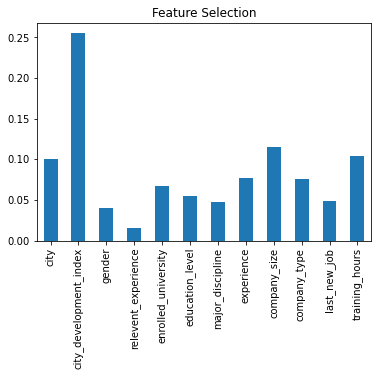

In [60]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(legend=False, title="Feature Selection");

### Trying the GradientBoostingClassifier

In [61]:
# Importing the GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

GBC_model = GradientBoostingClassifier(random_state=42)

GBC_model.fit(X_train_os, y_train_os)

GradientBoostingClassifier(random_state=42)

In [62]:
GBC_model.score(X_train_os, y_train_os)

0.8251710959025864

In [63]:
GBC_model.score(X_test_os, y_test_os)

0.8178101670814077

In [64]:
# Grid of hyperparameters
gs_grid = {
    "n_estimators": [500, 900, 1200, 1500],
    "max_depth": [3, 4],
    "min_samples_leaf": [6, 8],
    "min_samples_split": [2, 3],
    "learning_rate":[0.1, 1],
}

In [65]:
# Setting random state
np.random.seed(42)

# Inititializing the GridSearchCV model
gs_GBC_model = GridSearchCV(GBC_model,
                        param_grid=gs_grid,
                        cv=5,
                        verbose=True,
                        n_jobs=-1
                        )

In [66]:
gs_GBC_model.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [3, 4],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [2, 3],
                         'n_estimators': [500, 900, 1200, 1500]},
             verbose=True)

In [67]:
gs_GBC_model.score(X_train_os, y_train_os)

0.9172517998400143

In [68]:
gs_GBC_model.score(X_test_os, y_test_os)

0.847493778883754

In [70]:
y_preds_os = gs_GBC_model.predict(X_test_os)
print(confusion_matrix(y_preds_os, y_test_os))
print(accuracy_score(y_preds_os, y_test_os))
print(classification_report(y_preds_os, y_test_os))

[[2305  380]
 [ 478 2463]]
0.847493778883754
              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84      2685
         1.0       0.87      0.84      0.85      2941

    accuracy                           0.85      5626
   macro avg       0.85      0.85      0.85      5626
weighted avg       0.85      0.85      0.85      5626



In [72]:
gs_GBC_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [73]:
GBC_model = GradientBoostingClassifier(random_state=42, n_estimators=1500, min_samples_leaf=6, min_samples_split=2, max_depth=4, learning_rate=0.1)
GBC_model.fit(X_train_os, y_train_os)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=6, n_estimators=1500,
                           random_state=42)

In [75]:
list(GBC_model.feature_importances_)

[0.05404818750076411,
 0.3168223240154393,
 0.03314311834328318,
 0.012631567220827446,
 0.0451840866840274,
 0.05222325751687394,
 0.05980521244296059,
 0.039237986691841434,
 0.028398662732168616,
 0.030671504539333417,
 0.03797957741182667,
 0.06442792748906453,
 0.0,
 0.011556430310176741,
 0.0,
 0.0007477074720097882,
 0.0005271381765914349,
 0.006521569667840256,
 7.712034651308288e-05,
 0.19488812153096208,
 0.010427416362183582,
 0.0006810835453125305]

In [76]:
# Setting random state
np.random.seed(42)

# Instantiating SelectFromModel
sel = SelectFromModel(GBC_model)
sel.fit(X_train_os, y_train_os)

SelectFromModel(estimator=GradientBoostingClassifier(max_depth=4,
                                                     min_samples_leaf=6,
                                                     n_estimators=1500,
                                                     random_state=42))

In [78]:
sel.get_support()

array([ True,  True, False, False, False,  True,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False])

In [79]:
feature_dict = dict(zip(X_train_os.columns, list(GBC_model.feature_importances_)))
feature_dict

{'city': 0.05404818750076411,
 'city_development_index': 0.3168223240154393,
 'gender': 0.03314311834328318,
 'relevent_experience': 0.012631567220827446,
 'enrolled_university': 0.0451840866840274,
 'education_level': 0.05222325751687394,
 'major_discipline': 0.05980521244296059,
 'experience': 0.039237986691841434,
 'company_size': 0.028398662732168616,
 'company_type': 0.030671504539333417,
 'last_new_job': 0.03797957741182667,
 'training_hours': 0.06442792748906453,
 'city_is_missing': 0.0,
 'gender_is_missing': 0.011556430310176741,
 'relevent_experience_is_missing': 0.0,
 'enrolled_university_is_missing': 0.0007477074720097882,
 'education_level_is_missing': 0.0005271381765914349,
 'major_discipline_is_missing': 0.006521569667840256,
 'experience_is_missing': 7.712034651308288e-05,
 'company_size_is_missing': 0.19488812153096208,
 'company_type_is_missing': 0.010427416362183582,
 'last_new_job_is_missing': 0.0006810835453125305}

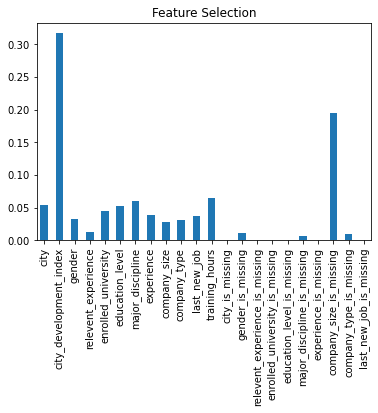

In [80]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(legend=False, title="Feature Selection");

In [81]:
# Training on selected features
GBC_model.fit(X_train_fs, y_train_fs)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=6, n_estimators=1500,
                           random_state=42)

In [82]:
GBC_model.score(X_train_fs, y_train_fs)

0.9161852279797351

In [86]:
GBC_model.score(X_test_fs, y_test_fs)

0.8425168858869534

In [104]:
GB_X_train_fs = X_train_fs.copy()
# GB_X_train_fs["company_size_is_missing"] = X_train_os["company_size_is_missing"]
GB_X_train_fs.drop(["gender", "relevent_experience"], axis=1, inplace=True)
GB_X_train_fs.head()

city  city_development_index  enrolled_university  education_level  \
1775     49                0.910000                    3                1   
13670    49                0.910000                    3                1   
8345     96                0.855000                    2                1   
27691     6                0.920000                    1                1   
25085    29                0.796417                    2                2   

       major_discipline  experience  company_size  company_type  last_new_job  \
1775                  6           1             4             5             1   
13670                 6          22             5             6             5   
8345                  6          17             5             6             1   
27691                 6          15             0             0             2   
25085                 6          21             0             0             3   

       training_hours  
1775              328  
13670              54  
8345               61  
27691              59  
25085              10

In [105]:
GB_X_test_fs = X_test_fs.copy()
# GB_X_test_fs["company_size_is_missing"] = X_test_os["company_size_is_missing"]
GB_X_test_fs.drop(["gender", "relevent_experience"], axis=1, inplace=True)
GB_X_test_fs.head()

city  city_development_index  enrolled_university  education_level  \
17745    14                   0.926                    3                3   
10352    62                   0.682                    3                1   
5102    102                   0.754                    3                1   
16307    65                   0.624                    3                1   
10406     6                   0.920                    3                1   

       major_discipline  experience  company_size  company_type  last_new_job  \
17745                 6          22             1             6             5   
10352                 6          16             0             0             1   
5102                  6          19             0             0             3   
16307                 6           7             3             6             2   
10406                 6          17             4             6             5   

       training_hours  
17745              60  
10352              80  
5102               69  
16307             166  
10406              70

In [106]:
GBC_model.fit(GB_X_train_fs, y_train_fs)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=6, n_estimators=1500,
                           random_state=42)

In [107]:
GBC_model.score(GB_X_train_fs, y_train_fs)

0.9107190471958048

In [108]:
GBC_model.score(GB_X_test_fs, y_test_fs)

0.8421613935300392

In [111]:
GB_y_preds_fs = GBC_model.predict(GB_X_test_fs)
print(confusion_matrix(GB_y_preds_fs, y_test_fs))
print(accuracy_score(GB_y_preds_fs, y_test_fs))
print(classification_report(GB_y_preds_fs, y_test_fs))

[[2281  386]
 [ 502 2457]]
0.8421613935300392
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      2667
         1.0       0.86      0.83      0.85      2959

    accuracy                           0.84      5626
   macro avg       0.84      0.84      0.84      5626
weighted avg       0.84      0.84      0.84      5626



In [112]:
# importing XGBClassifier
from xgboost import XGBClassifier

In [113]:
XGB_model = XGBClassifier()

In [115]:
np.random.seed(42)

XGB_model.fit(X_train_os, y_train_os)

D:\ML_Projects\Job-Change-Prediction\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:52:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [116]:
XGB_model.score(X_train_os, y_train_os)

0.9013421029241845

In [117]:
XGB_model.score(X_test_os, y_test_os)

0.8439388553146108

In [130]:
param_grid = {
    'n_estimators': [1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20],
    'reg_alpha': [1.2, 1.3],
    'reg_lambda': [1.2, 1.3],
    'subsample': [0.8, 0.9]
}

In [131]:
# Setting random state
np.random.seed(42)

# Inititializing the GridSearchCV model
gs_XGB_model = GridSearchCV(XGB_model,
                        param_grid=param_grid,
                        cv=5,
                        verbose=True,
                        n_jobs=-1
                        )

In [132]:
gs_XGB_model.fit(X_train_os, y_train_os)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


D:\ML_Projects\Job-Change-Prediction\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
           

In [135]:
gs_XGB_model.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 15,
 'n_estimators': 1000,
 'reg_alpha': 1.3,
 'reg_lambda': 1.3,
 'subsample': 0.9}

In [133]:
gs_XGB_model.score(X_train_os, y_train_os)

0.9990223091280775

In [134]:
gs_XGB_model.score(X_test_os, y_test_os)

0.858336295769641

In [277]:
np.random.seed(42)

XGB_model_bf = XGBClassifier(colsample_bytree=0.8, max_depth=5, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.9)
XGB_model_bf.fit(X_train_os, y_train_os)

D:\ML_Projects\Job-Change-Prediction\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=1.3, reg_lambda=1.3, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [278]:
XGB_model_bf.score(X_train_os, y_train_os)

0.9562261132343791

In [279]:
XGB_model_bf.score(X_test_os, y_test_os)

0.8489157483114113

In [280]:
XGB_model_bf.fit(X_train_fs, y_train_fs)

D:\ML_Projects\Job-Change-Prediction\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:47:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=1.3, reg_lambda=1.3, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [281]:
XGB_model_bf.score(X_train_fs, y_train_fs)

0.9543151719847125

In [282]:
XGB_model_bf.score(X_test_fs, y_test_fs)

0.8439388553146108

In [229]:
XGB_model.fit(X_train_fs, y_train_fs)

D:\ML_Projects\Job-Change-Prediction\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:44:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [230]:
XGB_model.score(X_train_fs, y_train_fs)

0.9004088525464403

In [231]:
XGB_model.score(X_test_fs, y_test_fs)

0.8371845005332386

In [213]:
# Trying out to fit GridSearchCV with feature selected 
gs_XGB_model.fit(X_train_fs, y_train_fs)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


D:\ML_Projects\Job-Change-Prediction\env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:39:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
           

In [214]:
gs_XGB_model.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 20,
 'n_estimators': 1000,
 'reg_alpha': 1.2,
 'reg_lambda': 1.3,
 'subsample': 0.9}

In [215]:
gs_XGB_model.score(X_train_fs, y_train_fs)

0.9991111901164341

In [216]:
gs_XGB_model.score(X_test_fs, y_test_fs)

0.8547813722004977

In [283]:
XGB_y_preds_fs = XGB_model.predict(X_test_fs)
print(confusion_matrix(XGB_y_preds_fs, y_test_fs))
print(accuracy_score(XGB_y_preds_fs, y_test_fs))
print(classification_report(XGB_y_preds_fs, y_test_fs))

[[2269  402]
 [ 514 2441]]
0.8371845005332386
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83      2671
         1.0       0.86      0.83      0.84      2955

    accuracy                           0.84      5626
   macro avg       0.84      0.84      0.84      5626
weighted avg       0.84      0.84      0.84      5626



In [284]:
# Exporting this XGB model
import pickle 

# pickle.dump(XGB_model, open("XGB_trained_model.pkl", "wb"))

### Evaluting Trained Model

##### Roc curve and AUC score

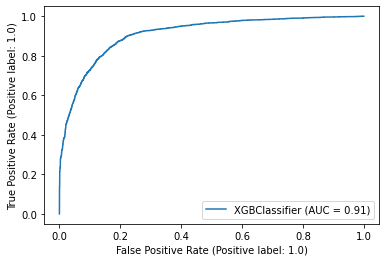

In [286]:
# Importing roc curve and auc score
from sklearn.metrics import plot_roc_curve 

# ploting roc_curve 
plot_roc_curve(XGB_model, X_test_fs, y_test_fs);

##### Confusion matrix

In [302]:
# Creating function to show confusion matrix in more representative way

sns.set(font_scale=1.5)

def show_conf_matrix(y_preds, y_test):
    """
    Shows the Confusion matrix in more representive way.
    """
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_preds, y_test),
                     annot=True,
                     cbar=False,
                     cmap="YlGnBu",
                     fmt="d")
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    


In [303]:
# Finding the preditions 
y_preds_XGB = XGB_model.predict(X_test_fs)

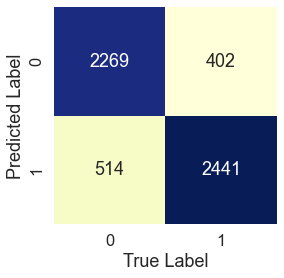

In [304]:
# Plotting confusion matrix
show_conf_matrix(y_preds_XGB, y_test_fs)

In [305]:
print(confusion_matrix(y_preds_XGB, y_test_fs))

[[2269  402]
 [ 514 2441]]


##### Classification report

In [308]:
print(classification_report(y_test_fs, y_preds_XGB))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      2783
         1.0       0.83      0.86      0.84      2843

    accuracy                           0.84      5626
   macro avg       0.84      0.84      0.84      5626
weighted avg       0.84      0.84      0.84      5626

